# Multiple Linear Regression
## CPE 490 590 
### Author: Rahul Bhadani

In [1]:
import tensorflow as tf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Serif'
plt.rcParams['font.size'] = 15

2024-02-16 17:12:42.681728: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-16 17:12:42.684907: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-16 17:12:42.719838: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-16 17:12:42.719865: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-16 17:12:42.720801: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

## Read the data

In [21]:
df = pd.read_csv('Dataset/Battery/02_24_2016_SP20-1_0C_lowcurrentOCV.csv')
df.columns

Index(['Data_Point', 'Test_Time(s)', 'Date_Time', 'Step_Time(s)', 'Step_Index',
       'Cycle_Index', 'Current(A)', 'Voltage(V)', 'Charge_Capacity(Ah)',
       'Discharge_Capacity(Ah)', 'Charge_Energy(Wh)', 'Discharge_Energy(Wh)',
       'dV/dt(V/s)', 'Internal_Resistance(Ohm)', 'Is_FC_Data',
       'AC_Impedance(Ohm)', 'ACI_Phase_Angle(Deg)'],
      dtype='object')

## We are only going to use two features

In [22]:
df_filtered = df[['Current(A)', 'Voltage(V)']]
y = df[['Charge_Capacity(Ah)']]
# Separate features and labels
features = df_filtered.values.astype(np.float64)
labels = y.values.reshape(-1, 1).astype(np.float64)

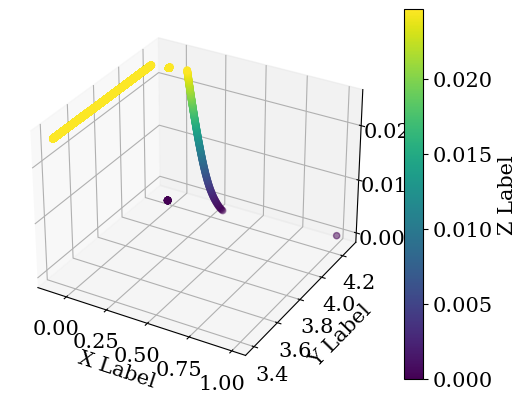

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming features is a 2D array and labels is a 1D array
x1 = features[:, 0]
y1 = features[:, 1]
z1 = labels

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a colormap for the z values
colors = plt.cm.viridis(np.linspace(0, 1, len(z1)))

scatter = ax.scatter(x1, y1, z1, c=z1, cmap='viridis')

# Add a colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Z Label')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')

plt.show()

In [24]:
df_filtered.shape

(63990, 2)

## Initialization

In [25]:
w = tf.Variable(tf.zeros([df_filtered.shape[1], 1], dtype=tf.float64))

In [26]:
w

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[0.],
       [0.]])>

# Define Model

In [36]:

# Define the model
def model(X):
    return tf.matmul(X, w) # Matrix Multiplication

# Define Loss Function

In [28]:
# Define the loss function (MSE)
def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Define Optimizer

In [29]:


# Define the optimizer (SGD)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001)

losses = []

# Divide Data into Test and Training

In [30]:
from sklearn.model_selection import train_test_split

# Assuming features and labels are numpy arrays
features = df_filtered.values.astype(np.float64)
labels = y.values.reshape(-1, 1).astype(np.float64)

# Split the data into training and test sets
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Convert the numpy arrays into TensorFlow tensors
features_train = tf.convert_to_tensor(features_train)
labels_train = tf.convert_to_tensor(labels_train)
features_test = tf.convert_to_tensor(features_test)
labels_test = tf.convert_to_tensor(labels_test)

# Training Loop

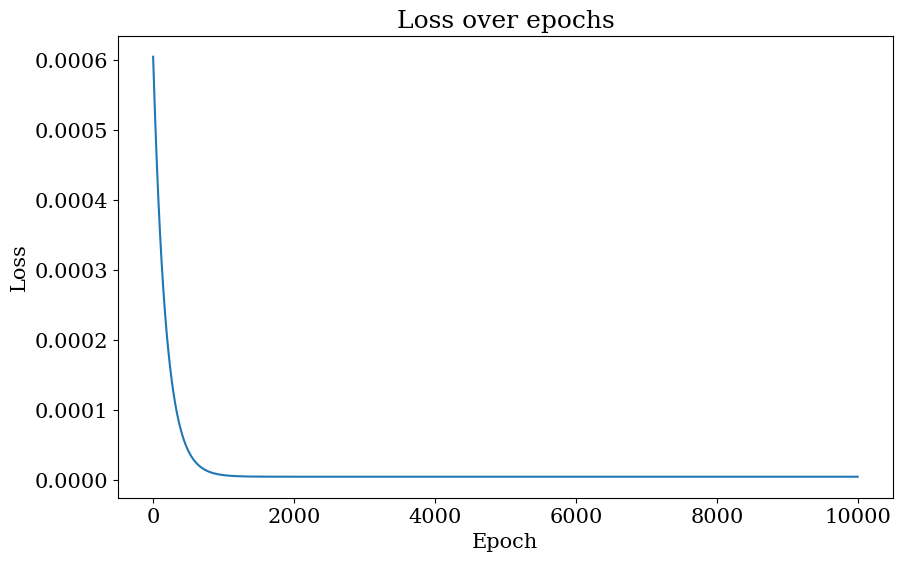

In [31]:
# Training loop
for epoch in range(10000):
    with tf.GradientTape() as tape:
        y_pred = model(features_train)
        loss = loss_fn(labels_train, y_pred)
    gradients = tape.gradient(loss, [w])
    optimizer.apply_gradients(zip(gradients, [w]))

    # Save the current loss
    losses.append(loss.numpy())

# Plot the losses
plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [32]:
loss

<tf.Tensor: shape=(), dtype=float64, numpy=4.421760628465116e-06>

# Measuring Accuracy on Test Data

In [35]:
# Make predictions on the test data
y_pred_test = model(features_test)
# Calculate the Mean Squared Error (MSE)
mse = tf.reduce_mean(tf.square(y_pred_test - labels_test))
# Calculate the Root Mean Squared Error (RMSE)
rmse = tf.sqrt(mse)
print('Test MSE: ', mse.numpy())
print('Test RMSE: ', rmse.numpy())

Test MSE:  4.26558786160253e-06
Test RMSE:  0.0020653299643404515
